# Decision Trees

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pandas as pd

In [17]:
iris = load_iris()

## What's a decision Tree?
A decision tree is a way to make decisions by asking a series of questions. It's like a flowchart where each question leads to more questions or to a final decision. <br>
Let's look to the tree below where the dataset is about flowers, specifically three species of iris flowers: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. It includes measurements of petal length and petal width for each flower. Based on these measurements, we want to predict the species of the iris flower. <br>
You start by checking if the flower's petal length is less than 2.45 cm. If yes, it's an Iris-Setosa. If no, you check if the petal width is less than 1.75 cm. If yes, it's likely an Iris-Versicolor, and if no, it's probably an Iris-Virginica. <br>
Is that simple !!

In [33]:
features= pd.DataFrame(iris.data[:, 2:], columns=iris.feature_names[2:])
mapp = {0: "setosa", 1: "versicolor", 2:"virginica"}
target = pd.DataFrame(iris.target, columns=["Types"]) 
target = target.Types.map(mapp)
features["target"] = target.to_frame()
features.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [ ]:
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

In [11]:
export_graphviz(
tree_clf,
out_file="iris_tree.dot",
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)

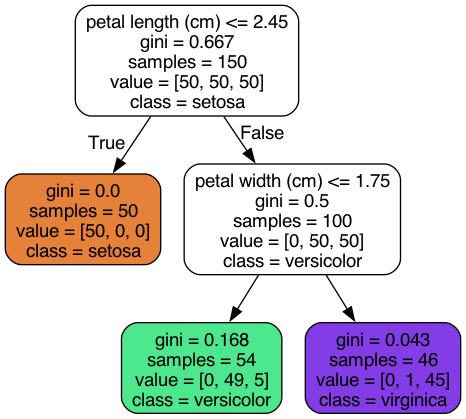

In [14]:
! dot -Tpng iris_tree.dot -o iris_tree.png
from IPython.display import display
from PIL import Image
imagem = Image.open('iris_tree.png')

# Mostre a imagem no notebook
display(imagem)

# Understanding the tree
Let's understand all the information in the tree above 
1. **Samples:** This tells us how many training examples are in this node. For example, if a node says it has 100 samples, it means 100 flowers from our training data reached this point in the tree.
2. **Value:** This tells us how many of each type of flower (species) are in the node. For instance, a node might have 0 Iris-Setosa, 1 Iris-Versicolor, and 45 Iris-Virginica flowers.
3. **Gini:** This measures how mixed up the classes are in the node. If the Gini score is 0, it means all the flowers in that node belong to the same species, which is perfect. The formula for Gini score is a bit complex, but it basically calculates the impurity of the node.
4. **Class:** The prediction that node will make

Other Important Concepts:
1. **Node:** In a decision tree represents a point where a decision is made. Each node examines the value of a particular feature (like petal length or width in our flower example) and decides how to split the data based on that feature. Nodes can be either internal nodes, where decisions are made and further splits occur, or leaf nodes, which represent the final outcome or prediction. In simpler terms, nodes are like decision points in the tree where the tree decides what to do next based on the data it's given. 
2. **Root Node:** Is the very first node in a decision tree. It's like the starting point or the top of the tree. 
3. **Leaf Nodes:** Think of leaf nodes as the endpoints of a decision tree. They're like the final decision points where you don't need to ask any more questions. 
4. **Depth:** Depth simply tells you how far down the tree you've gone from the starting point (the root node). It's like counting the number of questions you've asked to make a decision. For instance, if you've asked one question to split the flowers into two groups, you're at depth 1. If you ask another question to split one of those groups into two more groups, you're at depth 2. And so on.

## Calculating Impurity of the Nodes

### Gini Impurity Formula
$$G_i = 1 - \sum_{k=1}^{n} p_{i, k}^2$$ <br><br>

Let's calculate the gini impurity for the tree leaf nodes:<br>
$$Orange:  1 - (50/50)^2 – (0/50)^2 – (0/50)^2 ≈ 0.0$$
$$Green:  1  – (0/54)^2 – (49/54)^2 – (5/54)^2 ≈ 0.168$$
$$Purple: 1  – (0/46)^2 – (1/46)^2 – (45/46)^2 ≈ 0.043$$

So we get the same results as in the picture because that's is how is calculated

### Entropy Formula
$$H_i = - \sum_{k=1}^{p} \left( p_{i,k} \neq 0 \right) \cdot \log p_{i,k}$$

Let's calculate the Entropy for the tree leaf nodes:<br>
$$Orange:  −50/50*log(50/50) ≈ 0.0$$
$$Green: −49/54*log(49/54) −5/54*log(5/54) ≈ 0.31$$
$$Purple: −1/46*log(1/46) −45/46*log(45/46) ≈ 0.11$$


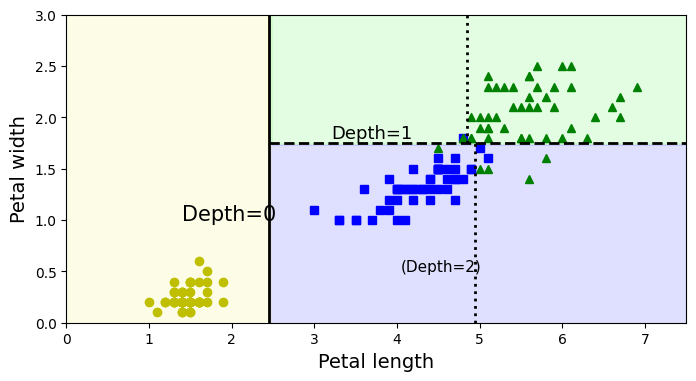

In [37]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

Imagine the picture above as a big garden with different types of flowers. You want to separate them into groups based on their petal lengths and widths.<br>

Now, think of the decision tree as a way to divide your garden. At the very beginning, you draw a thick line vertically at a specific petal length, let's say 2,45 cm. This line separates the flowers into two groups: those on the left side and those on the right side.

On the left side of the line, you only find one type of flower, let's say Sunflowers. So, this area is "pure" because it only has one type of flower. You don't need to split it anymore.

However, on the right side of the line, you have different types of flowers mixed together. It's not pure. So, you draw another line, this time horizontally, at a specific petal width, maybe 1.75 cm. This new line helps separate some of the flowers.

Now, if you set a rule that your division should only go two levels deep (max_depth = 2), you stop there. But if you allow it to go deeper (max_depth = 3), you could add more lines to divide the garden into even smaller sections, separating more types of flowers. These extra lines would be like dotted lines on your garden map.

## CART Algorithm
You're aware that at every node, you compute impurity, aiming for pure nodes where we can cleanly separate our classes. But the question that may arise now is, "How do I determine if asking whether the petal length is less than 2.45 is the right question?" The answer lies in identifying the question that minimizes impurity the most. However, you don't know this in advance. So, how do you find the best question? <br>

Simply Answering, is through trial and error and we do this using the CART (Classification and Regression Trees) algorithm. The CART  algorithm finds the best question by evaluating all possible questions about different features in the data and selecting the one that minimizes impurity the most.

Here's a simplified explanation of how it works:

1. **Evaluate all Features:** The algorithm considers each feature in the dataset and evaluates all possible questions that can be asked about each feature. For example, it might consider questions like "Is the petal length less than 2.45 cm?" or "Is the petal width greater than 1.75 cm?"
2. **Calculate Impurity:** For each question, the algorithm calculates the impurity of the resulting groups (or nodes) if the dataset is split based on that question. It measures how mixed the classes are in each group using impurity metrics like Gini impurity or entropy.
3. **Select the Best Question:** The algorithm selects the question that results in the lowest impurity after the split. This question is considered the best question because it maximally separates the classes into distinct groups.
4. **Repeat for Subgroups:** Once the best question is found, the algorithm recursively repeats this process for each resulting subgroup until certain stopping criteria are met, such as reaching a maximum depth or minimum number of samples in a node.<br><br>
By iteratively selecting the best questions to split the data, the CART algorithm constructs a decision tree that effectively separates the classes and makes accurate predictions for new data points.

$$ J(k, t_k) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}} $$

where:<br>
 measures the impurity of the left/right subset: $$ G_{\text{left}/\text{right}}$$ 
 Is the number of instances in the left/right subset:$$ m_{\text{left}/\text{right}}$$


## Hyperparameters
1. **max_depth:** This parameter determines the maximum depth of the decision tree. A deeper tree can capture more complex relationships in the training data, but it is more likely to overfit. Setting a maximum depth helps prevent overfitting by limiting the depth of the tree.
2. **min_samples_split:** This parameter specifies the minimum number of samples required to split an internal node. If the number of samples in a node is less than this value, the node will not be split, and it will become a leaf node. Increasing this parameter can help prevent overfitting by ensuring that nodes are only split when they contain a sufficient number of samples.
3. **min_samples_leaf:** This parameter sets the minimum number of samples required to be at a leaf node. Leaf nodes that have fewer samples than this value will not be further split, regardless of the value of min_samples_split. Increasing this parameter can help prevent overfitting by ensuring that each leaf node represents a sufficient number of samples.
4. **min_weight_fraction_leaf:** Instead of setting a minimum number of samples, this parameter specifies the minimum sum of weights of samples required to be at a leaf node. It is similar to min_samples_leaf but considers the weight of each sample instead of the count. This parameter is useful when working with weighted data.
5. **max_leaf_nodes:** This parameter limits the maximum number of leaf nodes in the decision tree. If growing the tree would result in more leaf nodes than this value, the algorithm will stop growing the tree and prune it. Limiting the number of leaf nodes can help prevent overfitting by controlling the complexity of the tree.

## Regression problems
Decision trees work in a similar manner for both regression and classification tasks, as they both involve partitioning the feature space into regions and making predictions based on the majority class (for classification) or the average value (for regression) within each region. However, there are some key differences in how decision trees are constructed and how they make predictions for regression compared to classification:

1. Objective:
- **Classification:** In classification tasks, the objective is to predict the class label of a sample. Decision trees typically use impurity measures such as Gini impurity or entropy to determine the best split that maximizes the homogeneity of the classes within each region.
- **Regression:** In regression tasks, the objective is to predict a continuous numeric value. Decision trees for regression typically use metrics such as mean squared error or mean absolute error to determine the best split that minimizes the error in prediction within each region.
2. Prediction:
- **Classification:** For classification tasks, the prediction at each leaf node is the majority class of the training samples that fall into that node.
- **Regression:** For regression tasks, the prediction at each leaf node is the average (or median) of the target values of the training samples that fall into that node.
3. Calculating Impurity: 
- **Classification:** In classification like we saw we usually uses gini or entropy.
- **Regression:** In regression, we are going to use MSE or RMSE
4. Evaluation:
- **Classification:** In classification, evaluation metrics such as accuracy, precision, recall, and F1-score are commonly used to assess the performance of the model.
- **Regression:** In regression, evaluation metrics such as mean squared error, mean absolute error, and R-squared are commonly used to assess the performance of the model.
5. Stopping Criteria:
- **Classification:** Stopping criteria for decision trees in classification tasks typically include maximum tree depth, minimum samples per leaf, or maximum number of leaf nodes.
- ***Regressio:** Stopping criteria for decision trees in regression tasks are similar to those for classification, but may also include minimum reduction in variance or minimum samples per leaf.

### Pros:

1. **Interpretability:** Decision trees are easy to understand and interpret, making them accessible to non-experts and allowing for straightforward communication of the model's decision-making process. The tree structure resembles human decision-making, which enhances interpretability.
2. **No Data Preprocessing:** Decision trees can handle both numerical and categorical data without requiring extensive preprocessing such as normalization or scaling. They can also handle missing values by simply skipping the split for missing values, which reduces the need for data imputation.
3. **Feature Importance:** Decision trees provide a clear indication of feature importance. By examining the splits in the tree and the decrease in impurity (e.g., Gini impurity or entropy), you can identify the most influential features in the decision-making process.
4. **Nonlinear Relationships:** Decision trees can capture nonlinear relationships between features and the target variable. They can partition the feature space into regions with different response levels, allowing for flexible modeling of complex relationships.
5. **Scalability:** Decision trees are scalable and efficient, particularly for small to medium-sized datasets. They have a relatively low computational cost for training and prediction, making them suitable for real-time and interactive applications.

### Cons:

1. **Overfitting:** Decision trees are prone to overfitting, especially when they are deep or when the dataset is noisy or contains irrelevant features. Deep trees can capture noise in the training data, leading to poor generalization performance on unseen data.
2. **Instability:** Decision trees are sensitive to small variations in the training data, which can lead to different tree structures and predictions. This instability can make decision trees less robust and reliable compared to other models, especially in high-dimensional or noisy datasets.
3. **High Variance:** Decision trees have high variance, meaning that small changes in the training data can result in significantly different tree structures and predictions. Bagging and random forests can help mitigate this issue by averaging predictions from multiple trees.
4. **Bias Towards Dominant Classes:** Decision trees tend to favor dominant classes in imbalanced datasets, leading to biased predictions and poor performance for minority classes. Techniques such as class weighting or resampling can help address this imbalance.
5. **Limited Expressiveness:** Decision trees have limited expressiveness compared to more complex models like neural networks or gradient boosting machines. They may struggle to capture subtle and intricate patterns in the data, particularly when the relationships are highly nonlinear or involve interactions between features.

# Gradient Boosting Algorithm

## How does grandient boosting works?
Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. This method tries to fit the new predictor to the residual errors made by the previous predictor. <br>
Let's look at an exemple below to understand

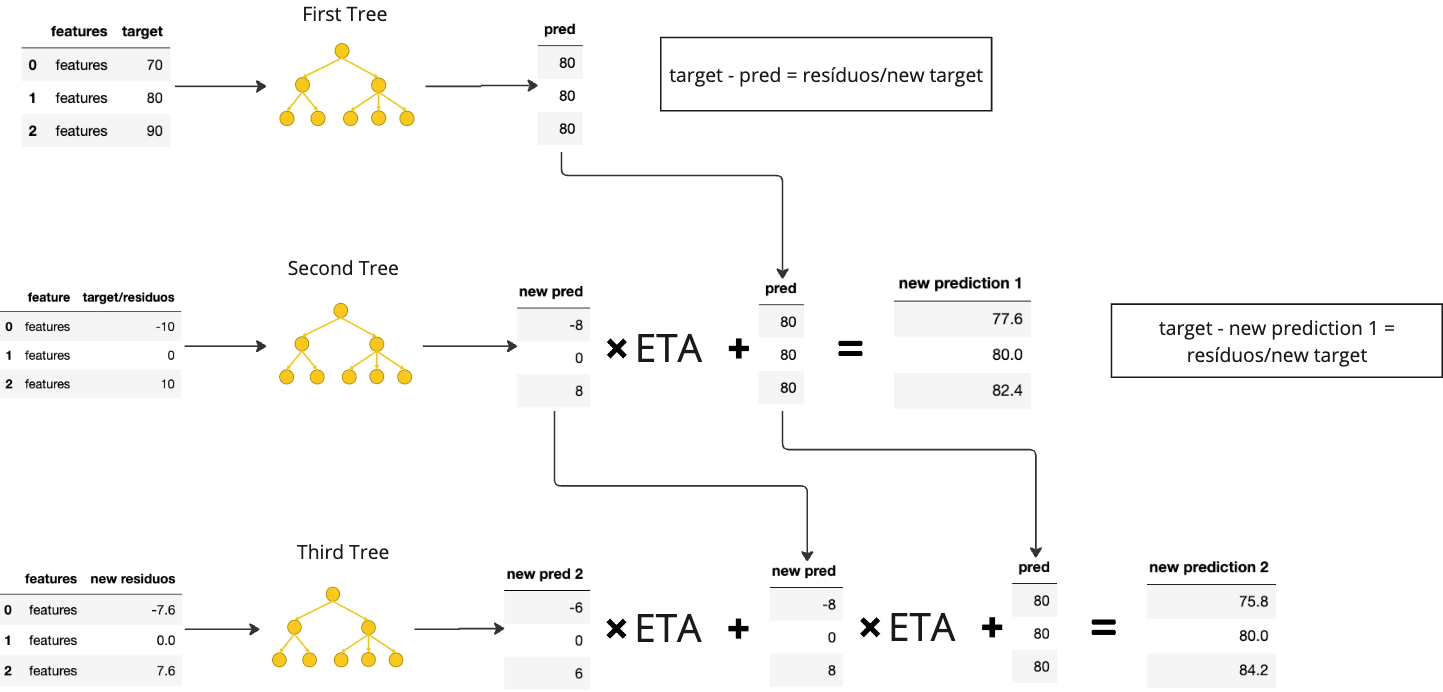

In [143]:
imagem = Image.open('image (2).png')

# Mostre a imagem no notebook
display(imagem)

Looking at the schema above let's try understand how gradient boosting works:

1. We begin by training the first decision tree and making predictions. Then, we use the true target values and the predicted ones to calculate the residuals.
2. Next, we utilize the residuals from the first tree as the new target for training our second decision tree. After training the new model, its predictions are used to update our initial predictions. However, we must decide the weight to assign to this update, which is referred to as ETA or the learning rate. We add these values to the initial predictions in an attempt to improve them, observing as we gradually approach the real values. Once again, we calculate the residuals.
3. The new residuals become the target for our third decision tree. As we check, we notice a decrease in the residuals. Now, we use the predictions from the third decision tree alongside those from the second decision tree to further update our initial predictions. Once more, we observe a closer alignment with the true values.
4. This process continues iteratively until we achieve the optimal result or until a certain stopping criteria is met.

## XG Boost
XG Boost is a python library that implement the gradient boost algorithm

## Paramms

1. **eta (learning rate):** The eta parameter controls the step size or learning rate of the boosting process. It scales the contribution of each tree in the ensemble. A higher eta value allows faster learning but can lead to overfitting if not carefully tuned.

2. **num_boost_round (or n_estimators):** The num_boost_round parameter specifies the number of boosting rounds or iterations (trees) to be run during training. Increasing the num_boost_round allows the model to learn more complex patterns in the data but also increases the risk of overfitting if not properly controlled.

3. **min_child_weight:** The min_child_weight parameter is the minimum sum of instance weights (hessian) needed in a child node. Higher values of min_child_weight result in a more conservative tree with fewer splits, which can help prevent overfitting, especially in the presence of imbalanced classes or noisy data.

4. **max_depth:** controls the maximum depth of each individual tree in the ensemble. A smaller max_depth value results in shallower trees, which are less likely to overfit the training data but may have limited predictive power. Conversely, a larger max_depth value allows trees to grow deeper, potentially capturing more complex patterns in the data, but also increasing the risk of overfitting.

In [42]:
import xgboost as xgb

In [54]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [56]:
xgb_params = {
    'eta': 0.03,
    'max_depth': 6,
    'objective': 'multi:softmax',
    'verbose': 1,
    'nthread': -1,
    'num_class': 3
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

[14:49:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



## Pros:

1. **High Predictive Accuracy:** Gradient Boosting often yields high predictive accuracy compared to other machine learning algorithms. It can capture complex relationships and interactions in the data, making it suitable for a wide range of predictive modeling tasks.
2. **Handles Mixed Data Types:** Gradient Boosting can handle a mix of numerical and categorical features without requiring extensive preprocessing. It can automatically handle missing values and categorical variables by employing techniques such as one-hot encoding and decision trees.
3. **Robust to Overfitting:** Gradient Boosting includes mechanisms to prevent overfitting, such as shrinkage (learning rate) and tree regularization parameters like max_depth and min_child_weight. By carefully tuning these parameters, it's possible to build models that generalize well to unseen data.
4. **Feature Importance:** Gradient Boosting provides insights into feature importance, allowing users to interpret the model's behavior and identify the most influential features in the prediction process. This can be valuable for feature selection and understanding the underlying patterns in the data.
5. **Flexibility:** Gradient Boosting can be used for both regression and classification tasks and is adaptable to various loss functions. It can handle a wide range of data types and is robust to outliers and noise in the data.

## Cons:

1. **Computationally Intensive:** Training Gradient Boosting models can be computationally intensive, especially when dealing with large datasets or complex models with many trees and deep trees. Training time and memory requirements may become significant bottlenecks, particularly in real-time or resource-constrained environments.
2. **Sensitive to Hyperparameters:** Gradient Boosting models have several hyperparameters that need to be carefully tuned to achieve optimal performance. Finding the right combination of hyperparameters can be challenging and may require extensive experimentation and computational resources.
3. **Prone to Overfitting:** While Gradient Boosting includes mechanisms to prevent overfitting, such as regularization and shrinkage, it can still be prone to overfitting, especially if hyperparameters are not properly tuned or if the dataset is noisy or contains outliers.
4. **Black Box Nature:** Like other ensemble methods, Gradient Boosting produces complex models that can be challenging to interpret. While feature importance provides some insight into the model's behavior, understanding the precise decision-making process of the model may be difficult, particularly for non-technical stakeholders.
5. **Limited Parallelism:** Gradient Boosting models are inherently sequential, as each tree is built sequentially based on the residuals of the previous trees. This limits the degree of parallelism during model training and may result in longer training times, especially on multi-core or distributed systems.

## Decision Trees vs XG Boost
When to choose each:

### Decision Trees:

1. **Interpretability Requirements:** Decision trees are preferred when interpretability is crucial, and the model's decision-making process needs to be easily understandable to non-experts. They provide transparent and intuitive models that can be explained in a straightforward manner.
2. **Simple Problems:** Decision trees are suitable for simple classification and regression problems with relatively few features and straightforward relationships between features and the target variable. They are particularly effective when the data has clear and distinct decision boundaries.
3. **Noisy Data:** Decision trees can handle noisy data and outliers reasonably well. They are robust to irrelevant features and can automatically handle missing values without requiring extensive preprocessing.
4. **Scalability:** Decision trees are efficient and scalable for small to medium-sized datasets. They have a low computational cost for training and prediction, making them suitable for applications where computational resources are limited.

### Gradient Boosting:

1. **High Predictive Accuracy:** Gradient boosting is preferred when high predictive accuracy is the primary goal, and interpretability can be sacrificed to achieve better performance. It often outperforms decision trees and other machine learning algorithms in terms of predictive accuracy, especially for complex and high-dimensional datasets.
2. **Complex Relationships:** Gradient boosting is well-suited for capturing complex relationships and interactions in the data. It can handle nonlinear relationships, feature interactions, and subtle patterns that decision trees may struggle to capture effectively.
3. **Large Datasets:** Gradient boosting can handle large datasets with thousands or millions of samples and features. While it may be computationally intensive, especially for deep trees and large ensembles, it can scale well to big data environments with distributed computing frameworks.
4. **Ensemble Learning:** Gradient boosting is effective in ensemble learning scenarios, where multiple weak learners are combined to form a strong learner. It can overcome the limitations of individual models and produce highly accurate predictions by leveraging the collective intelligence of the ensemble.

In summary, decision trees are suitable for interpretable and simple problems with modest predictive accuracy requirements, while gradient boosting is preferable for complex problems where high predictive accuracy is paramount, and interpretability can be traded off. Understanding the characteristics of the data and the goals of the modeling task is crucial for making an informed choice between decision trees and gradient boosting.